In [1]:
username = "Alex";
env = "integrate";
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\";
using Pkg;
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\");
include(pathtorepo * "dynamical-systems\\system.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems

sE, sI, rE, rI, Y  = -50..50, -50..50, -50..50, -50..50, -50..50
box = sE × sI × rE × rI × Y

using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
t = 1000; tt = 1000.0; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = true, abstol = 1e-14, reltol = 1e-14);

In [25]:
τsE = 3.0; γE = 2.0; s0E = 0.15;
τsI = 10.0; γI = 8.0; s0I = 0.1;

τrE = 2.0; kE = 5.0; IE = 0.9; wEE = 3.5; wIE = 5.0; θE = 0.2;
τrI = 6.0; kI = 5.0; II = 0.0; wEI = 5.0; wII = 3.0; θI = 0.4;

τY = 10.0;  βY = 1.0;
ythr = 0.0; sEthr = 0.5; kY = 0.01
γY = 0.7;

p = [τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, γY, ythr, sEthr, kY];

u0 = [0.16626283100926173, 0.387761311569549, 0.017231707534190562, 0.023802991067523854, 0.42202055827896523]

ds = CoupledODEs(rate_model, u0, p, diffeq = integ_set)

5-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  rate_model
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = true, abstol = 1.0e-14, reltol = 1.0e-14)
 parameters:    [3.0, 2.0, 0.15, 10.0, 8.0, 0.1, 2.0, 5.0, 0.9, 3.5  …  0.0, 5.0, 3.0, 0.4, 10.0, 1.0, 0.7, 0.0, 0.5, 0.01]
 time:          0.0
 state:         [0.16626283100926173, 0.387761311569549, 0.017231707534190562, 0.023802991067523854, 0.42202055827896523]


In [32]:
#fp, ei, _ = fixedpoints(ds, box, rate_jac)

In [26]:
tr, trange = trajectory(ds, t, Ttr = tt, Δt = tstep)

(5-dimensional StateSpaceSet{Float64} with 1000001 points, 1000.0:0.001:2000.0)

In [27]:
tickssize = 30; labelsize = 35

35

In [32]:
lyapunovspectrum(ds, 100000)

5-element Vector{Float64}:
  1.4980292126753604e-5
 -0.06594396246172113
 -0.1492042151192836
 -0.42773928802603717
 -0.7833072391318521

In [17]:
indexx, indexy, indexz = 3, 1, 2
tstart, tend = 1, length(tr)
GLMakie.activate!()
f = Figure(resolution = (700, 700))
ax = LScene(f[1, 1], show_axis = true)
scale!(ax.scene, 1, 1, 1)
lines!(ax, tr[tstart:tend, indexx], tr[tstart:tend, indexy], tr[tstart:tend, indexz], linewidth = 1.0, color = :deeppink)

#for fp_ in fp
    #scatter!(ax, fp_[indexx], fp_[indexy], fp_[indexz], markersize = 12.0)
#end
display(GLMakie.Screen(), f)

GLMakie.Screen(...)

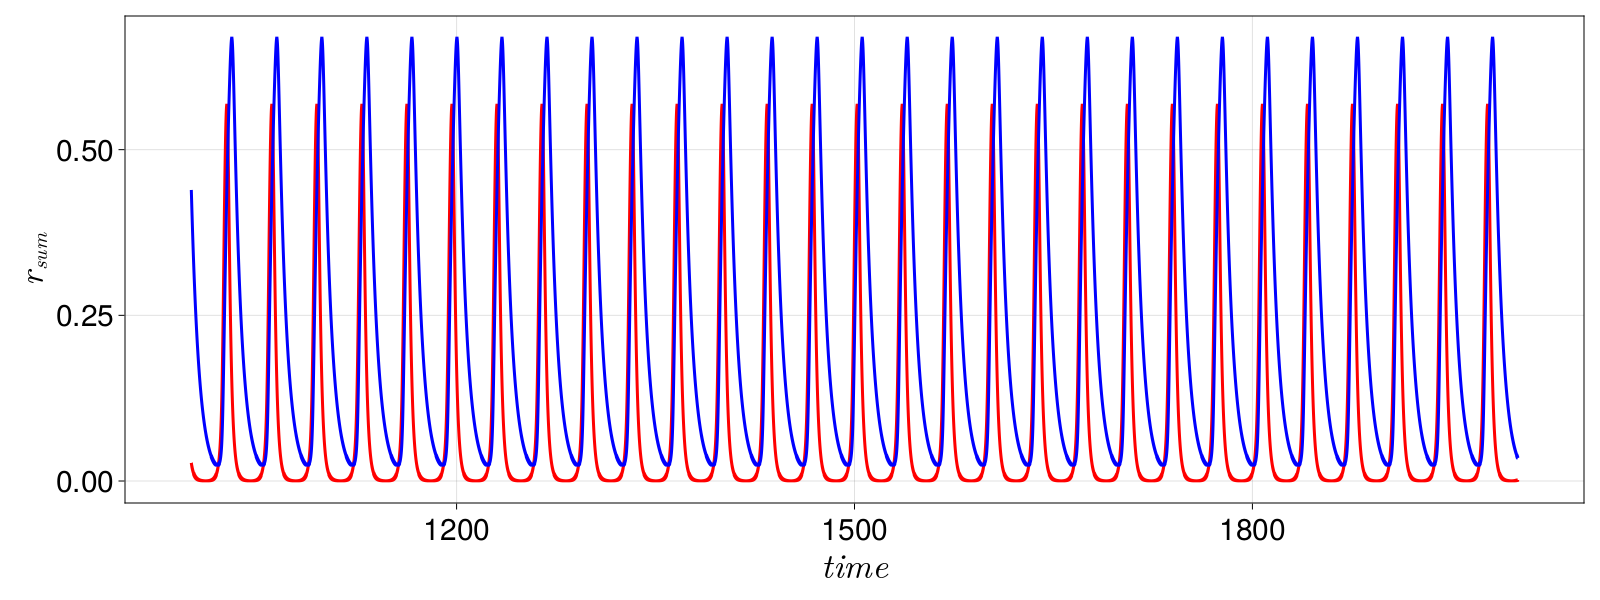

CairoMakie.Screen{IMAGE}


In [18]:
lw = 3.0;
CairoMakie.activate!()
f= Figure(resolution = (1600, 600))
axisrHz  = Axis(f[1, 1], xlabel = L"time", ylabel = L"r_{sum}", xlabelsize = labelsize, ylabelsize = labelsize, xticklabelsize = tickssize, yticklabelsize = tickssize, xgridvisible = true, ygridvisible = true)

lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, 3], linewidth = lw, color = :red)
lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, 4], linewidth = lw, color = :blue)

display(f)